
# Handwritten Digit Recognition CNN Practice (MNIST Dataset) 
<hr>

![MNIST](https://neurohive.io/wp-content/uploads/2019/05/Screenshot-from-2019-05-29-21-23-47.png)

[DOWNLOAD DATA](https://www.kaggle.com/oddrationale/mnist-in-csv?select=mnist_train.csv)

### History of Handwritten Digit dataset 

Modified National Institute of Standards and Technology database (MNIST dataset) is a large dataset of handwritten digits which is widely used in image processing and machine learning. The set of images in the MNIST database is a combination of two of NIST's databases: Special Database 1 and Special Database 3. Special Database 1 and Special Database 3 consist of digits written by high school students and employees of the United States Census Bureau, respectively.<br> 


[READ MORE](https://en.wikipedia.org/wiki/MNIST_database)



### Why to start with MNIST dataset?
The MNIST dataset is a well-known dataset for image classification. Tensorflow and Keras also provide MNIST dataset directly through their APIs. For the learning purpose, the MNIST dataset is easy to use and experiment with different machine learning techniques.

### About the Notebook
* In this notebook, I have covered the necessary steps to approach any Machine Learning Classification Problem.
* Included Image Visualization for better understanding.
* Quick Links to the functions I have used to explore it in depth.
* Basic techniques such as Confusion Matrix, Image Augmentation, etc.
* I have also compared the results of Model without using CNN and CNN.

I have tried to make this notebook as simple as possible, along with covering the basic approach to tackle any classification task. 
### Task
The task is to classify the images in 10 class, i.e., [0-9], inclusively.  


# Required Imports

**Imports:**
* pandas : For handeling csv dataset
* numpy : Support for Pandas and calculations
* Matplotlib - For visualization (Plotting graphs)
*  keras - Prediction Models

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import cv2 as cv

from keras.layers import Conv2D, Input, LeakyReLU, Dense, Activation, Flatten, Dropout, MaxPool2D
from keras import models
from keras.optimizers import Adam,RMSprop 
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

import pickle

%matplotlib inline

ModuleNotFoundError: No module named 'cv2'

# Loading and Visualizing Dataset
<hr>

## About Dataset
MNIST dataset has the following features:
* Dataset size 60,000 samples of handwritten images.
* The size of each image is 28x28 pixels.
* Each image has only 1 color channel, i.e., grayscale image.
* Each pixel has value in the range of [0,255] where 0 represents black, and 255 represents white.
* Each image has labeled from 0-9.


## Loading train.csv

This will loads the data from Kaggle dataset train.csv into a **Dataframe**. As file type is CSV, I am loading it using [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) of **pandas**. Then using NumPy for **random permutation** of the training dataset. I am using seed to regenerate the same permutation every time. Change seed value to get different permutation. 
<br>

**Check out these functions for more info:**
* [df.iloc[]](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html)
* [np.random](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html)

In [5]:
np.random.seed(1) # seed
df_train = pd.read_csv("digit recognition/mnist_train.csv") # Loading Dataset
df_train = df_train.iloc[np.random.permutation(len(df_train))] # Random permutaion for dataset (seed is used to resample the same permutation every time)

In [6]:
df_train.head(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
15281,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21435,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44536,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13518,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47529,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_train.shape

(60000, 785)

Training set has 60,000 images. And has 785 columns, 1st coloumn is label for the image and rest 784 are the pixel values. <br>**Remember it is flattened. I will reshape it latter.**

### Preparing Training and Validation data 
**It requires a few steps:**
* Assuming the validation set size. I am taking it 10% of the training set.  
* Splitting training set into a training set (90% original training set) and validation set (10% original training set) from the training dataset.
* Reshaping both sets into (sample size,28,28,1) where sample size represents the size of the train or validation set.
* Splitting the labels for both training set and validation set.

Using df.iloc of pandas for slicing the data frame(read more link below), then converting into NumPy array and finally reshaping NumPy array in required shape.<br>

**Check out these functions for more info:**
* [df.iloc[]](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html)
* [np.reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html)
* [np.asarray](https://docs.scipy.org/doc/numpy/reference/generated/numpy.asarray.html)

In [8]:
sample_size = df_train.shape[0] # Training set size
validation_size = int(df_train.shape[0]*0.1) # Validation set size 

# train_x and train_y
train_x = np.asarray(df_train.iloc[:sample_size-validation_size,1:]).reshape([sample_size-validation_size,28,28,1]) # taking all columns expect column 0
train_y = np.asarray(df_train.iloc[:sample_size-validation_size,0]).reshape([sample_size-validation_size,1]) # taking column 0

# val_x and val_y
val_x = np.asarray(df_train.iloc[sample_size-validation_size:,1:]).reshape([validation_size,28,28,1])
val_y = np.asarray(df_train.iloc[sample_size-validation_size:,0]).reshape([validation_size,1])

#### Shape of training set

In [9]:
train_x.shape,train_y.shape

((54000, 28, 28, 1), (54000, 1))

## Loading test.csv
This will load the test.csv. It has 18,000 images and no label is there. Prediction need to be done on these images. After loading converting the data in form of numpy array and reshaping it.

In [12]:
df_test = pd.read_csv("digit recognition/mnist_test.csv")
test_x = np.asarray(df_test.iloc[:,:]).reshape([-1,28,28,1])

## Normalize Pixel Data
Each pixel values lies between [0,255]. This value range is too high and it will be difficult for any model to learn. The best approach is **normalize** the data. In this case, as the pixel value is in the known range it sufficient to **scale the pixel values** in range [0,1] by simply dividing the array by **255**. 

In [8]:
# convirting pixel values in range [0,1]
train_x = train_x/255
val_x = val_x/255
test_x = test_x/255

## Visualize Digits dataset
<hr>

The first and fundamental thing to check is the frequency of the classes in the dataset, as the balanced dataset is always good to start. But this is not always true, and there are several supervised learning tasks in which the classes are not balanced, also in case of anomaly detection, there is a large difference between the positive and negative class. But that is out of the scope of this notebook.

### 1. Frequency plot for the training set

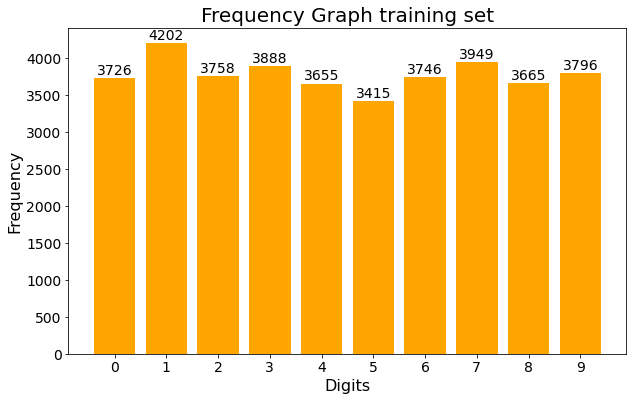

In [9]:
# Cheacking frequency of digits in training and validation set
counts = df_train.iloc[:sample_size-validation_size,:].groupby('label')['label'].count()
# df_train.head(2)
# counts
f = plt.figure(figsize=(10,6))
f.add_subplot(111)

plt.bar(counts.index,counts.values,width = 0.8,color="orange")
for i in counts.index:
    plt.text(i,counts.values[i]+50,str(counts.values[i]),horizontalalignment='center',fontsize=14)

plt.tick_params(labelsize = 14)
plt.xticks(counts.index)
plt.xlabel("Digits",fontsize=16)
plt.ylabel("Frequency",fontsize=16)
plt.title("Frequency Graph training set",fontsize=20)
plt.savefig('digit_frequency_train.png')  
plt.show()

### 2. Frequency plot for the validation set

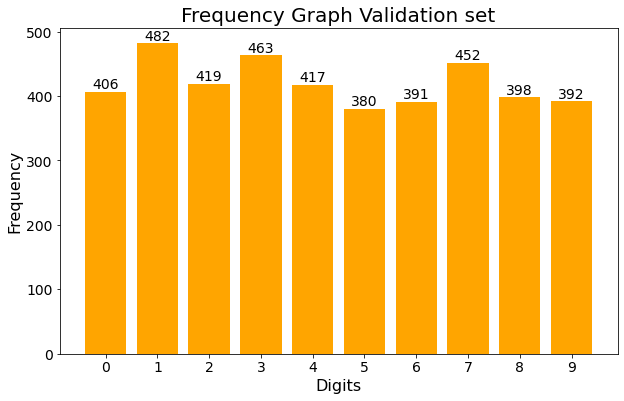

In [10]:
# df_train.iloc[sample_size-validation_index:,1:]
# Cheacking frequency of digits in training and validation set
counts = df_train.iloc[sample_size-validation_size:,:].groupby('label')['label'].count()
# df_train.head(2)
# counts
f = plt.figure(figsize=(10,6))
f.add_subplot(111)

plt.bar(counts.index,counts.values,width = 0.8,color="orange")
for i in counts.index:
    plt.text(i,counts.values[i]+5,str(counts.values[i]),horizontalalignment='center',fontsize=14)

plt.tick_params(labelsize = 14)
plt.xticks(counts.index)
plt.xlabel("Digits",fontsize=16)
plt.ylabel("Frequency",fontsize=16)
plt.title("Frequency Graph Validation set",fontsize=20)
plt.savefig('digit_frequency_val.png')
plt.show()

It seems that both the training and validation set has a good balance between the classes, so let's move on and see a few of the digits.

### Visualizing the digits by plotting Images
<hr>
This will plot the first 30 images of digits with the label.

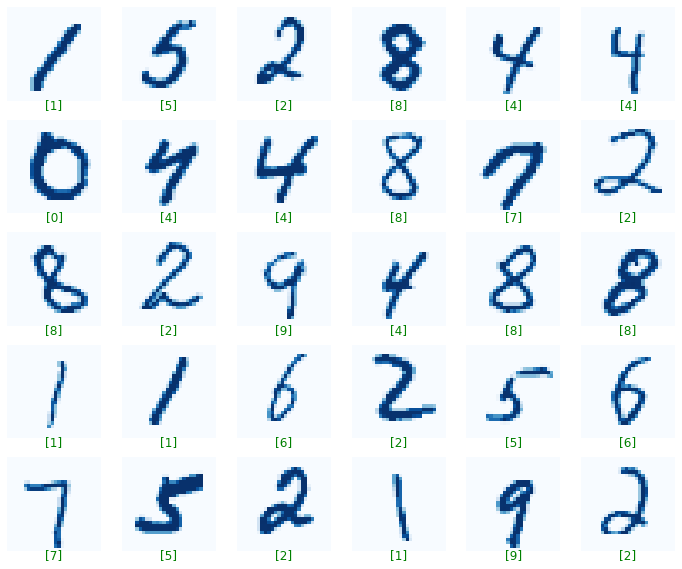

In [11]:
rows = 5 # defining no. of rows in figure
cols = 6 # defining no. of colums in figure

f = plt.figure(figsize=(2*cols,2*rows)) # defining a figure 

for i in range(rows*cols): 
    f.add_subplot(rows,cols,i+1) # adding sub plot to figure on each iteration
    plt.imshow(train_x[i].reshape([28,28]),cmap="Blues") 
    plt.axis("off")
    plt.title(str(train_y[i]), y=-0.15,color="green")
plt.savefig("digits.png")

# Buliding Model

<hr>

![model](https://miro.medium.com/max/1000/1*4OUonEDfZwCfR4Y-G-h1fw.jpeg)

In [12]:
# # Loading pickled resources
# !wget https://www.kaggleusercontent.com/kf/31703703/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..f6l0FhjgIxCd7bfZA3MF_A.oHtR56AzfPZhslGD-R2Uca6Kce1yVCG805lWUk25H5T-MQciLjAjmoTd9RPGh1zdUlwtbMZPuAi9_1BrHNZfFlJ5duoYajHON-Sk_mMy7OIePjqNRqo8vkEnTHmbV6Oj1Z6MR9dGzT2Gch2soeaLaZnIjxJt5e8DsFaia6dTjxRzzzrKaQDWLikdsjo2xwbQp9yo4-8htw6adclSbtnXsMV4kJNBs25d-qqRLuUSuhqxxCbJMkuuZgPjnEzqO7aLU0zqcGYUXDDdx1O-oU2ncMAYpXYqssqzQgD6-t4Fl83XWQnNqRv5wec5cdD-7IF9cbjyD_CE-Ib863pPJ9RJc-IYypbUvvKfMQuhahe9NiuRGNSNodVlSiuSzk0nudl5uHqf7V7_1h_juPPVj8mUUOqleLye9_ZtJ2S8pD6hUXT9p7kPy6v6RdoaE_LgkrijyvmJhmS-yMETpazrlQlKp96A3W0EVdhtVxmW7QUwbjIlzdEs7whAe4EcqQIzd4H69TR6hLCqVlaZkMBBPvBWr_dCTxu6htDP8qE2QCH08H1VPXyZLERTMH1SRENnwa_BxMTVkc_pP70tkvGA2xtgoJHzAlcOZZfqsa5fmCa8tqIOkME1hn88Xgm5eh58JXT2ZXyA7hxfpzKP3UQXegeBnPaEPOLa5eEoND9E9ypyi5I1QWa7QTMe9ruEbXr6DUbJ.GvQemyhjKibaOnfNrnRUXQ/model.h5
# !wget https://www.kaggleusercontent.com/kf/31703703/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..yUikFJ_W78H0Zfo7LsQ-2g.1-XOTVZwAUnN9uzbSyaPEuXbdS_5mlLvYRUOaFjMZewxYpcCFASz2fROWEIHjC-KHCOOO-DYjLY7pWHvN81cOW25n28C2mT6aFnWkObrkUYXlbZW0sS7iaKwxUw4a_XwYYUmMfeNuOpKf5OsBdv-L2y0GOLb-fT8hDqteihh6qP97VOT1fmvdv2gYcG0WqKw4mcWwtWAYyqQAScE_knALnyTvWZTF73LR99gaxy_w41t3PHo0rfHy037Cll0lWznkf6ppfAIv_CKr_v2HfpB9go0DJbXKqD87LkcnNF94e_b95i0UYfS2pMugXS4ob1WnSblE34Df_n9rB3pWMXn9DPnqlwDqa1snJOc3CLeK9MTsPQ9NuzEFIjxMnWXQhNGQ7sXYX8qAPqanQ3-OQSZHHD8lufpcJEguVqOuOWY5qZlKe4ZTzn3g8fhbssulphnajM4ZThC5pceWnVT2rowvERPtlvijy6AdAGEy57BxN7FeweBVZAR1Zv5RA_wE2qo4DFmyK36j8p_bVZHTnVvqFFWz0SAimJqzMmzxNrZY7_NGuqDy5rjUmoa2y0e0-qPFBcfFWvT2Pe_RKW21dBOKH9HbI1j0WS_Ua72FI1-MToX8DUHRdN9UNLJhnugwWY_lWvppU-fRCJFhkSPIYyfzbx1cH2ykLLZRz4-sjCegE78I03ue3096Q7kUMw9-ZGd.a3Ge-GJWsUMNPuyQ0gpMfg/model_img_augmentation.h5
# !wget https://www.kaggleusercontent.com/kf/31703703/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..Hq9sgF7KDfRSLRlO3zlQSg.dQKW1YCUjhwAZbX-54g1ygj0qTWSH6egywwOdIqm-hwUxTWnj6L9EkNK8qncdH4FeNbEtAjYrQ2oStYGIVVJzsqFDQwaXBsnzvKQx2icckW3ww-aNtDxATdkVY2ZiqMLAMIMyy8_nFoFvt2tQm48XeIUecn3OTL6Te3VfRr3OXQ1QWU7lbY-8BetDVy0tbrLV_vIkV-fUy_FLGsa7QgH4Xerxi7xXoItAmJCbEIXBt5pR-_frNz0rdDoj30e-xGdUkLRiBNe1Nk9_1EFacGwTwhM3KqE8SDF5CtVqP7XsFhFIxVal-lmUy1hzsPi0xZt_ikRIbmfTb6K5HmQ97Jzm4nd7YdQ_u2ScbhLLFy2pj0n4XapGZgMYE5o_2_Cv2c_3uquTGDTpjiOAA25ylrFypwZGmenAeCSrJZIto0ta_onqVPz_euNQY4PHJ5P3aJi2KWHJzNl3LxBU2u-LfkfOzwYXu1DIOOqkzSSLWraxZoleean-9oawdqq0doQhogfx2wBr844ApCpVYDxEEn8CxAwfK-RoiE7MdEasDYtWujlmcOnMQsQjUohnJcOWwQSIOIEpqevcXBU4PPoiw-ex-vEUtflupnNRtlwwLRzjyrV_6VJbdQkus1F0HfToHEBjB6tkZyydreIK3Zi8u0l1YvT3VRtWMw3amc3s7f86ilZZ_uoGhW8fc7k14JmubAX.FiOfKdbaYf0TStGFpmhDSw/history_1.hs
# !wget https://www.kaggleusercontent.com/kf/31703703/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..IWrH9XKSk0oDOCNg7wTlbg.A49rZubI479_e2da4l7JhZBGm7YdJ87UviDnyAP6924Kez0dRIPjzw-67wCI_iMtJGQQJrnn74pVwzt0cPa8CVTJIApHs2t4qZd-7dlWDcOqcwlC8zaLECXT836Jey6auUY1JE1C8YApSHBfDr-WB_KO75JQRzDdXV6LFEdPfzTyoXWf0zmuyg4bi41rPhH2UkhEfPowmze9G_nOWg64WHfJTBCcWzMDf56GbyNmp46RtdKuqriMH0sAHHFrz94DQkHnnz0U149yYC6oUkqlvty-l7jvEGM8Nc1_-LZbptB_8cZxu9gOFYprjdUyAerb5Izz-J1nkextV-0OUe8SUYj8XwG5pF6pNDbZrkoDTurkkORlMIEAKNhl6SZvPjmb1Mv-owxnrpSdHnHejp61kFp-FOi_oFFzAJiW5NVm8pmMln7RP3JgcuCfWKQUEHlrsC5NaMvsFG9CNlXeul9E4PXS6ycuRzflz5uWxvoe1Dt-Tm4Pnoaa-CvJ2hsLKsX-oH66LE6sWQm8UrDTJ0eBxaWG8QAbJ6WeOICv9zykRx8ro5j18RWgnOLK2x9PLJmYA7rL6Zm7kxavLQMTovSg-IZ9EyuTuSmGv-0Rd_0Gmb5-2qvBsYKGcn8lbJMmOXfeDWEqTT0XBK-VfVcDNxX8EZd2iYD1c3nJa6R324v4JGTOLHZJbL7UNtGXtQn-3WVc.ShxYOf_zson_2CAlaDOT8w/history_2.hs
!wget https://www.kaggleusercontent.com/kf/32045042/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..LcCpstRicdTOqMGGjh1wmg.LJi-FKBMbLQL5cc2XHtVyNpT--iVgBeKlbby9C_YjBjm7dSLbbqY4F27EpcgOWZYo22EOWWwyVMAd7VsYOzQkUGK-sj6gvWswv9CTc8I8ZDMkZvGdRRy3COevzGk21yXTlbRG1D--BVHlwCZVaYSMBKt9gIeCELgl-ZcFKoOjZSUpcZXBrmfuBA_OK63fc_olldErb5p5S_qWVecdJ1r49anGVs-x682Q0y5cCs9lr7q1n2B2saWkiC4d8tMGRMyUTCt1xXl6nENaYNh4C4u0DGOBfT14jEuWfyzFH3obgs_TtD4Bqg2zzxjjUwtJd7ymBNCVq7td-_chLlds-lps5uq4BLckniKl9QgbJ7ZcL6qoMonLzPn5VUE-vlIfUCfBieYOHKkWb3Buz557IrG4mk9GqAvOPp_Vzd5n9h9SGEvOFCsiG-_IinSIA7a2NxSPvtNEKmYcG37CS0xLfEV8copUh3pIHdVVLn9SXd2r5Wg2Q5q8zUnEvnHSxcPNg7LheviS4NMX18bsL9Wqm2PP_WDd7QkO_wJ0AsGyDveLWKebHB26wS_iz3w7X-EAheRmBrCyiUfJWHSM-IJPAJk9EIhRH1zr8WVtwsc19PRevFcY4RDHx7fyvPFVrJ2fFsicZMaDfJchFR_lP_uYDs6NvPu5AXXEkXnFMsrJ0IAICiEDwadnj0eV5w5b-DozhrP.8pmfOFY56dYt_Z2UVg-UWA/model_img_augmentation.h5

--2020-07-03 18:47:01--  https://www.kaggleusercontent.com/kf/32045042/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..LcCpstRicdTOqMGGjh1wmg.LJi-FKBMbLQL5cc2XHtVyNpT--iVgBeKlbby9C_YjBjm7dSLbbqY4F27EpcgOWZYo22EOWWwyVMAd7VsYOzQkUGK-sj6gvWswv9CTc8I8ZDMkZvGdRRy3COevzGk21yXTlbRG1D--BVHlwCZVaYSMBKt9gIeCELgl-ZcFKoOjZSUpcZXBrmfuBA_OK63fc_olldErb5p5S_qWVecdJ1r49anGVs-x682Q0y5cCs9lr7q1n2B2saWkiC4d8tMGRMyUTCt1xXl6nENaYNh4C4u0DGOBfT14jEuWfyzFH3obgs_TtD4Bqg2zzxjjUwtJd7ymBNCVq7td-_chLlds-lps5uq4BLckniKl9QgbJ7ZcL6qoMonLzPn5VUE-vlIfUCfBieYOHKkWb3Buz557IrG4mk9GqAvOPp_Vzd5n9h9SGEvOFCsiG-_IinSIA7a2NxSPvtNEKmYcG37CS0xLfEV8copUh3pIHdVVLn9SXd2r5Wg2Q5q8zUnEvnHSxcPNg7LheviS4NMX18bsL9Wqm2PP_WDd7QkO_wJ0AsGyDveLWKebHB26wS_iz3w7X-EAheRmBrCyiUfJWHSM-IJPAJk9EIhRH1zr8WVtwsc19PRevFcY4RDHx7fyvPFVrJ2fFsicZMaDfJchFR_lP_uYDs6NvPu5AXXEkXnFMsrJ0IAICiEDwadnj0eV5w5b-DozhrP.8pmfOFY56dYt_Z2UVg-UWA/model_img_augmentation.h5
Resolving www.kaggleusercontent.com (www.kaggleusercontent.com)... 35.190.26.106
Connecting to www.kagg

### Model Using Keras

There are two different ways of defining the Model in Keras:
* Sequential Model
* Function API

Functional API is used to build a more complicated Model such as for multi-output Models, directed acyclic graphs, or models with shared layers. I am using the Sequential Model in this notebook to keep things simple. 
<br>
In Sequential Model, you can add each layer sequentially.<br>

**Description of Model:**
* 2 Convolutional Blocks
    > Each block consists of 2 Conv2D layers with LeakyRelU activation layers. Then a MaxPool2D layer and finally a Dropout Layer. 
* Then Dense Layers and Output layer after Flatten layer.
* MaxPool2D layer is used to reduce the size of the image. Pool size `(2,2)` means reducing the image from `(28,28)` to `(14,14)`. Reducing the features.
* Dropout layer drops the few activation nodes while training, which acts as regularization. Do let the model to over-fit.
* Output layer has 10 nodes with sigmoid activation.

**Check out these functions for more info:**
* [Conv2D](https://keras.io/layers/convolutional/#conv2d)
* [LeakyReLU](https://keras.io/layers/advanced-activations/#leakyrelu)
* [MaxPool2D](https://keras.io/layers/pooling/#maxpool2d)
* [Dropout](https://keras.io/layers/core/#dropout)
* [Flatten](https://keras.io/layers/core/#flatten)
* [Dense](https://keras.io/layers/core/#dense)

In [13]:
model = models.Sequential()

In [14]:
# Block 1
model.add(Conv2D(32,3, padding  ="same",input_shape=(28,28,1)))
model.add(LeakyReLU())
model.add(Conv2D(32,3, padding  ="same"))
model.add(LeakyReLU())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Block 2
model.add(Conv2D(64,3, padding  ="same"))
model.add(LeakyReLU())
model.add(Conv2D(64,3, padding  ="same"))
model.add(LeakyReLU())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation="sigmoid"))

### Compiling Model
Model compilation required the selection of optimizer and loss function. Let me discuss a few important things to avoid confusion.

**Optimizers:** Keras provides several optimizers that can be used by importing the optimizers and passing in compile function.
* SGD (Stochastic gradient descent optimizer)
* RMSprop 
* Adam
* Adamax

There are several more check it out [here](https://keras.io/optimizers/). 
<br>

One of the important things is the selection of the **learning rate**. If the learning rate is too high, the loss may not converge, and if it is too low, the training will be slow. So it is important to select the reasonably fair value of learning rate. One of the good value to start with is 0.001. If it doesn't work, then other higher or lower values can be tried. The rest of the parameters generally works well and need not be defined. The default value works most of the time.
Here, I am using **Adam optimizer**, but **RMSprop** can also be used.
<br>

**Loss Functions:** Keras provides all of the well-known loss functions which work well for most of the time. But if you need to define a custom loss function, you can. Defining a custom function is out of the scope of this notebook. Let's understand the loss function for the classification tasks. I am discussing 3 loss function here. There are several more check it out [here](https://keras.io/losses/). 
* **binary_crossentropy**: This loss function is used for the binary classification task. The single-node output layer is required. 0 and 1 is used for classification.
* **categorical_crossentropy**:  Used for Used for Multi-class classification 
* **sparse_categorical_crossentropy:** Used for Multi-class classification. <br>

**Difference between categorical_crossentropy and sparse_categorical_crossentropy:**
* If your targets are one-hot encoded, use categorical_crossentropy.
    Examples of one-hot encodings (for three classes):
    * [1,0,0]
    * [0,1,0]
    * [0,0,1]
* But if your targets are integers, use sparse_categorical_crossentropy.
    Examples of integer encodings (for the sake of completion):
    * 1
    * 2
    * 3
    
Here, I am using **sparse_categorical_crossentropy**, as the target values are integer not **one-hot vector**.


In [15]:
initial_lr = 0.001
loss = "sparse_categorical_crossentropy"
model.compile(Adam(lr=initial_lr), loss=loss ,metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)       

### Training 
[model.fit()](https://keras.io/models/sequential/#fit) is used to train the model. It takes training data, batch_size, no of epochs, validation data. There are several more parameters, and you can check the documentation [here](https://keras.io/models/sequential/#fit).
I am taking the epochs = 20 and batch size = 256. It will return the history of training, which later can be used to analyze the performance.

In [16]:
epochs = 20
batch_size = 256
history_1 = model.fit(train_x,train_y,batch_size=batch_size,epochs=epochs,validation_data=[val_x,val_y])

Train on 37800 samples, validate on 4200 samples
Epoch 1/20
37800/37800 [==============================] - 7s 194us/step - loss: 0.4376 - accuracy: 0.8616 - val_loss: 0.1275 - val_accuracy: 0.9624
Epoch 2/20
37800/37800 [==============================] - 3s 68us/step - loss: 0.0881 - accuracy: 0.9731 - val_loss: 0.0908 - val_accuracy: 0.9714
Epoch 3/20
37800/37800 [==============================] - 2s 65us/step - loss: 0.0594 - accuracy: 0.9821 - val_loss: 0.0583 - val_accuracy: 0.9802
Epoch 4/20
37800/37800 [==============================] - 2s 66us/step - loss: 0.0490 - accuracy: 0.9846 - val_loss: 0.0528 - val_accuracy: 0.9838
Epoch 5/20
37800/37800 [==============================] - 2s 63us/step - loss: 0.0379 - accuracy: 0.9878 - val_loss: 0.0509 - val_accuracy: 0.9852
Epoch 6/20
37800/37800 [==============================] - 2s 65us/step - loss: 0.0318 - accuracy: 0.9900 - val_loss: 0.0462 - val_accuracy: 0.9862
Epoch 7/20
37800/37800 [==============================] - 2s 63us/st

In [17]:
model.save("model.h5")
with open('history_1.hs', 'wb') as history:
    pickle.dump(history_1,history)

In [18]:
# model = models.load_model("model.h5")
# with open('history_1.hs', 'rb') as history:
#     history_1 = pickle.load(history)

### Training Performance.
Let's see how the training goes—plotting the accuracy and loss of both training and validation set with each epoch. In the accuracy graphs, there is clearly a difference in the training and validation set. The model is more accurate on the training set. It seems that the model is a little bit **overfit**. So can we do better?

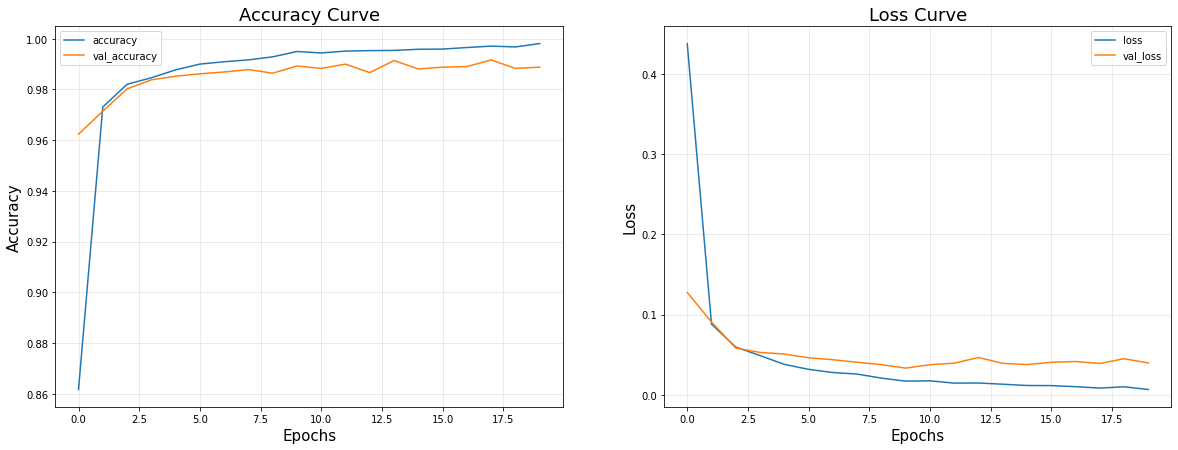

In [19]:
# Diffining Figure
f = plt.figure(figsize=(20,7))

#Adding Subplot 1 (For Accuracy)
f.add_subplot(121)

plt.plot(history_1.epoch,history_1.history['accuracy'],label = "accuracy") # Accuracy curve for training set
plt.plot(history_1.epoch,history_1.history['val_accuracy'],label = "val_accuracy") # Accuracy curve for validation set

plt.title("Accuracy Curve",fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Accuracy",fontsize=15)
plt.grid(alpha=0.3)
plt.legend()

#Adding Subplot 1 (For Loss)
f.add_subplot(122)

plt.plot(history_1.epoch,history_1.history['loss'],label="loss") # Loss curve for training set
plt.plot(history_1.epoch,history_1.history['val_loss'],label="val_loss") # Loss curve for validation set

plt.title("Loss Curve",fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Loss",fontsize=15)
plt.grid(alpha=0.3)
plt.legend()

plt.show()

### Confusion Matrix
In the field of **machine learning** and specifically the problem of **statistical classification**, a confusion matrix, also known as an **error matrix**, is a specific table layout that **allows visualization of the performance of an algorithm**, typically a supervised learning one (in unsupervised learning it is usually called a matching matrix). Each row of the matrix represents the instances in a predicted class, while each column represents the instances in an actual class (or vice versa). The name stems from the fact that it makes it easy to see if the system is confusing two classes (i.e. commonly mislabeling one as another). [Source](https://en.wikipedia.org/wiki/Confusion_matrix)

Let's try to see how well the model is performing on the validation set.

In [20]:
val_p = np.argmax(model.predict(val_x),axis =1)

error = 0
confusion_matrix = np.zeros([10,10])
for i in range(val_x.shape[0]):
    confusion_matrix[val_y[i],val_p[i]] += 1
    if val_y[i]!=val_p[i]:
        error +=1
        
print("Confusion Matrix: \n\n" ,confusion_matrix)
print("\nErrors in validation set: " ,error)
print("\nError Persentage : " ,(error*100)/val_p.shape[0])
print("\nAccuracy : " ,100-(error*100)/val_p.shape[0])
print("\nValidation set Shape :",val_p.shape[0])

Confusion Matrix: 

 [[405.   0.   0.   0.   0.   0.   1.   0.   0.   0.]
 [  0. 478.   1.   0.   1.   1.   0.   1.   0.   0.]
 [  0.   0. 414.   0.   1.   0.   0.   1.   3.   0.]
 [  0.   0.   0. 456.   0.   3.   0.   1.   2.   1.]
 [  0.   0.   1.   0. 406.   0.   4.   0.   1.   5.]
 [  0.   0.   0.   0.   0. 378.   0.   0.   1.   1.]
 [  0.   1.   1.   0.   1.   2. 386.   0.   0.   0.]
 [  0.   2.   2.   0.   1.   0.   0. 445.   1.   1.]
 [  0.   0.   1.   0.   0.   0.   0.   0. 397.   0.]
 [  1.   0.   0.   0.   2.   1.   0.   0.   0. 388.]]

Errors in validation set:  47

Error Persentage :  1.119047619047619

Accuracy :  98.88095238095238

Validation set Shape : 4200


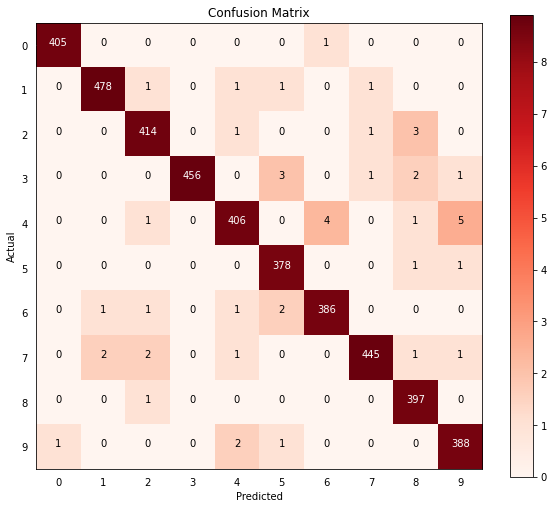

In [21]:
f = plt.figure(figsize=(10,8.5))
f.add_subplot(111)

plt.imshow(np.log2(confusion_matrix+1),cmap="Reds")
plt.colorbar()
plt.tick_params(size=5,color="white")
plt.xticks(np.arange(0,10),np.arange(0,10))
plt.yticks(np.arange(0,10),np.arange(0,10))

threshold = confusion_matrix.max()/2 

for i in range(10):
    for j in range(10):
        plt.text(j,i,int(confusion_matrix[i,j]),horizontalalignment="center",color="white" if confusion_matrix[i, j] > threshold else "black")
        
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig("Confusion_matrix1.png")
plt.show()

# Improving Result by Image Augmentation

<hr>

![augmentation](https://cdn-images-1.medium.com/max/1000/1*C8hNiOqur4OJyEZmC7OnzQ.png)

A deep network requires extensive data to achieve decent performance. To build a good classifier with small training data, image augmentation can solve the problem to a greater extend. Image augmentation generates images by different ways of processing, such as random shift, rotation, flips, etc. 
<br>

You can check great python package for data [augmentation](https://github.com/albumentations-team/albumentations).

![Augmentation](https://camo.githubusercontent.com/43d652646b37ef66762212c0e0d3150ba481347c/68747470733a2f2f686162726173746f726167652e6f72672f776562742f73752f77612f6e702f737577616e70656f36777737777077746f6274727a645f636732302e6a706567)*Image [source](https://github.com/albumentations-team/albumentations)* 

<hr>

Here I am using the ImageDataGenerator() function of Keras for Image augmentation. Parameters to use:

* **rotation_range:**   randomly rotate images in the range (degrees, 0 to 180)
* **zoom_range:**  Randomly zoom image 
* **width_shift_range:**  randomly shift images horizontally (fraction of total width)
* **height_shift_range:**   randomly shift images vertically (fraction of total height)
* **horizontal_flip:**   randomly flip images (Can't be used in this case as it changes the digit)
* **vertical_flip:**  randomly flip images (Can't be used in this case as it changes the digit)

Read more about [ImageDataGenerator()](https://keras.io/preprocessing/image/)

After the creation and configuration of the ImageDataGenerator, you must fit it on the data, which calculates any statistics required to perform the transformation on the data. This can be done by calling the fit() function on datagen.

In [22]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(train_x)

### Learning Rate

<hr>

ReduceLROnPlateau() is a callback function provided by Keras, which is used to reduce the learning rate if when a metric has stopped improving.

<br>

**Parameters:**

* **monitor:**  takes the metric to observe (In this case val_accuracy)
* **patience:** waits for that much epochs for the improvements, if not, then decrease the learning rate. (here `2`)
* **factor:** factor by which the learning rate will be reduced. new_lr = lr * factor (here `0.5`)
* **min_lr:** lower bound on the learning rate. (here `0.00001`)

**Read More:**
[Read more](https://keras.io/callbacks/#reducelronplateau)



In [23]:
lrr = ReduceLROnPlateau(monitor='val_accuracy',patience=2,verbose=1,factor=0.5, min_lr=0.00001)

### Further Traning
[model.fit_generator()](https://keras.io/models/sequential/#fit_generator) is used to train the model on data generated batch-by-batch by image augmentation. The data generator is an iterator that generates and provides data as per request by fit_generator(). We can configure the batch size and get the batches by calling the flow() function.



In [24]:
epochs = 20
history_2 = model.fit_generator(datagen.flow(train_x,train_y, batch_size=batch_size),steps_per_epoch=int(train_x.shape[0]/batch_size)+1,epochs=epochs,validation_data=[val_x,val_y],callbacks=[lrr])

Epoch 1/20
148/148 [==============================] - 13s 89ms/step - loss: 0.1349 - accuracy: 0.9614 - val_loss: 0.0341 - val_accuracy: 0.9919
Epoch 2/20
148/148 [==============================] - 12s 83ms/step - loss: 0.0653 - accuracy: 0.9806 - val_loss: 0.0286 - val_accuracy: 0.9905
Epoch 3/20
148/148 [==============================] - 12s 80ms/step - loss: 0.0534 - accuracy: 0.9836 - val_loss: 0.0287 - val_accuracy: 0.9905

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 4/20
148/148 [==============================] - 12s 82ms/step - loss: 0.0400 - accuracy: 0.9878 - val_loss: 0.0269 - val_accuracy: 0.9917
Epoch 5/20
148/148 [==============================] - 12s 80ms/step - loss: 0.0362 - accuracy: 0.9890 - val_loss: 0.0285 - val_accuracy: 0.9914

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 6/20
148/148 [==============================] - 14s 92ms/step - loss: 0.0297 - accuracy: 0.9908 - val_loss: 0.02

In [25]:
model.save("model_img_augmentation.h5")
with open('history_2.hs', 'wb') as history:
    pickle.dump(history_2,history)

In [26]:
model = models.load_model("model_img_augmentation.h5")
# with open('history_2.hs', 'rb') as history:
#     history_2 = pickle.load(history)

### Training Performance.
Now we can see that after further training, the accuracy of training and validation set almost converges with high accuracy. It seems that the model has been significantly improved after image augmentation.

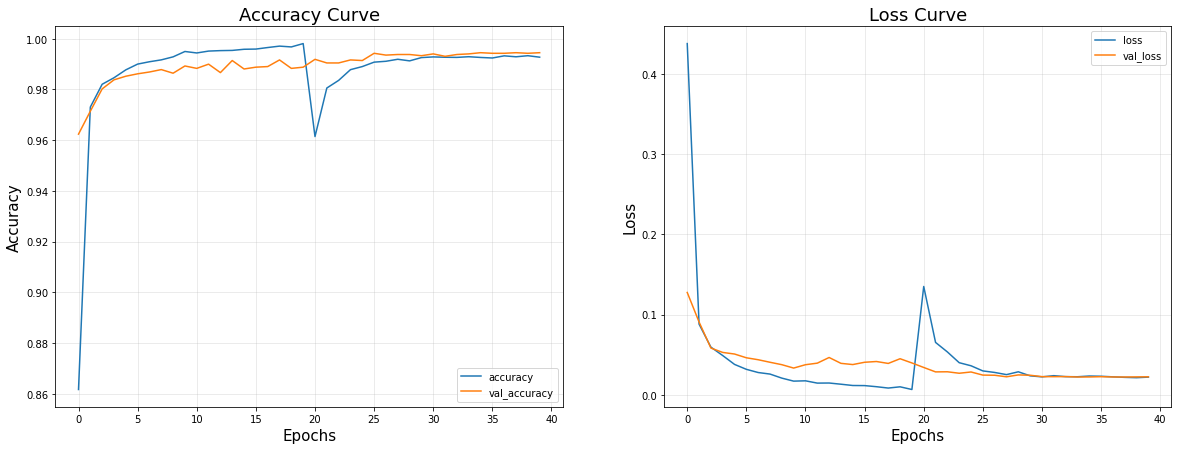

In [27]:
# Diffining Figure
f = plt.figure(figsize=(20,7))
f.add_subplot(121)

#Adding Subplot 1 (For Accuracy)
plt.plot(history_1.epoch+list(np.asarray(history_2.epoch) + len(history_1.epoch)),history_1.history['accuracy']+history_2.history['accuracy'],label = "accuracy") # Accuracy curve for training set
plt.plot(history_1.epoch+list(np.asarray(history_2.epoch) + len(history_1.epoch)),history_1.history['val_accuracy']+history_2.history['val_accuracy'],label = "val_accuracy") # Accuracy curve for validation set

plt.title("Accuracy Curve",fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Accuracy",fontsize=15)
plt.grid(alpha=0.3)
plt.legend()


#Adding Subplot 1 (For Loss)
f.add_subplot(122)

plt.plot(history_1.epoch+list(np.asarray(history_2.epoch) + len(history_1.epoch)),history_1.history['loss']+history_2.history['loss'],label="loss") # Loss curve for training set
plt.plot(history_1.epoch+list(np.asarray(history_2.epoch) + len(history_1.epoch)),history_1.history['val_loss']+history_2.history['val_loss'],label="val_loss") # Loss curve for validation set

plt.title("Loss Curve",fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Loss",fontsize=15)
plt.grid(alpha=0.3)
plt.legend()

plt.show()

## Confusion Matrix

In [28]:
val_p = np.argmax(model.predict(val_x),axis =1)

error = 0
confusion_matrix = np.zeros([10,10])
for i in range(val_x.shape[0]):
    confusion_matrix[val_y[i],val_p[i]] += 1
    if val_y[i]!=val_p[i]:
        error +=1
        
confusion_matrix,error,(error*100)/val_p.shape[0],100-(error*100)/val_p.shape[0],val_p.shape[0]

print("Confusion Matrix: \n\n" ,confusion_matrix)
print("\nErrors in validation set: " ,error)
print("\nError Persentage : " ,(error*100)/val_p.shape[0])
print("\nAccuracy : " ,100-(error*100)/val_p.shape[0])
print("\nValidation set Shape :",val_p.shape[0])

Confusion Matrix: 

 [[406.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0. 477.   1.   0.   0.   0.   1.   2.   0.   1.]
 [  0.   0. 417.   0.   0.   0.   0.   1.   1.   0.]
 [  0.   0.   1. 461.   0.   0.   0.   0.   1.   0.]
 [  0.   0.   0.   0. 415.   0.   1.   0.   1.   0.]
 [  0.   0.   0.   0.   0. 379.   0.   0.   1.   0.]
 [  0.   0.   1.   0.   1.   0. 388.   0.   1.   0.]
 [  0.   0.   2.   0.   1.   0.   0. 449.   0.   0.]
 [  0.   0.   1.   0.   0.   0.   0.   0. 397.   0.]
 [  0.   0.   0.   0.   3.   1.   0.   0.   0. 388.]]

Errors in validation set:  23

Error Persentage :  0.5476190476190477

Accuracy :  99.45238095238095

Validation set Shape : 4200


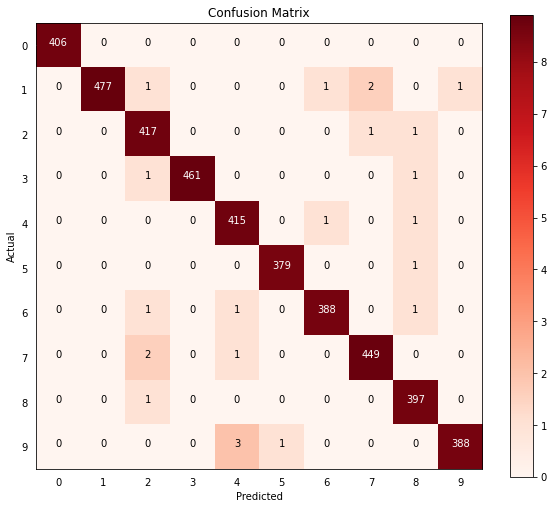

In [29]:
f = plt.figure(figsize=(10,8.5))
f.add_subplot(111)

plt.imshow(np.log2(confusion_matrix+1),cmap="Reds")
plt.colorbar()
plt.tick_params(size=5,color="white")
plt.xticks(np.arange(0,10),np.arange(0,10))
plt.yticks(np.arange(0,10),np.arange(0,10))

threshold = confusion_matrix.max()/2 

for i in range(10):
    for j in range(10):
        plt.text(j,i,int(confusion_matrix[i,j]),horizontalalignment="center",color="white" if confusion_matrix[i, j] > threshold else "black")
        
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig("Confusion_matrix2.png")
plt.show()

# Visualizing Result

<hr>

### All Errors in the Validation set
Let's see all the errors in the validation set. It seems that in most of the cases, the recognition of digits is difficult for even humans. So we can say that our model is performing well.

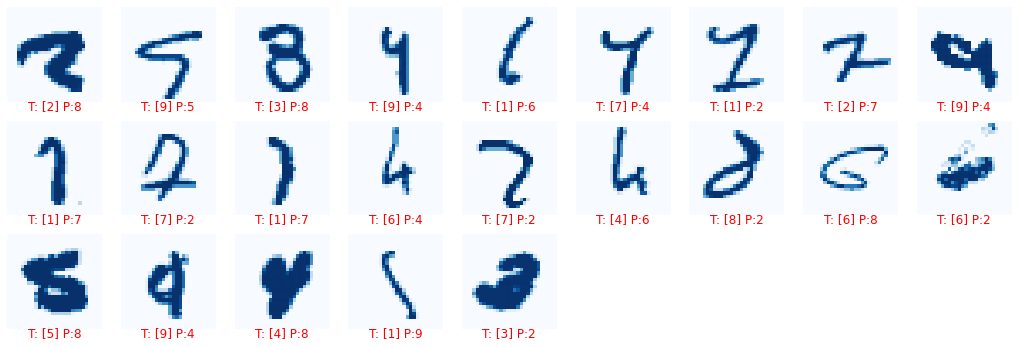

In [30]:
rows = 4
cols = 9

f = plt.figure(figsize=(2*cols,2*rows))
sub_plot = 1
for i in range(val_x.shape[0]):
    if val_y[i]!=val_p[i]:
        f.add_subplot(rows,cols,sub_plot) 
        sub_plot+=1
        plt.imshow(val_x[i].reshape([28,28]),cmap="Blues")
        plt.axis("off")
        plt.title("T: "+str(val_y[i])+" P:"+str(val_p[i]), y=-0.15,color="Red")
plt.savefig("error_plots.png")
plt.show()

# Predict on test set

In [31]:
test_y = np.argmax(model.predict(test_x),axis =1)

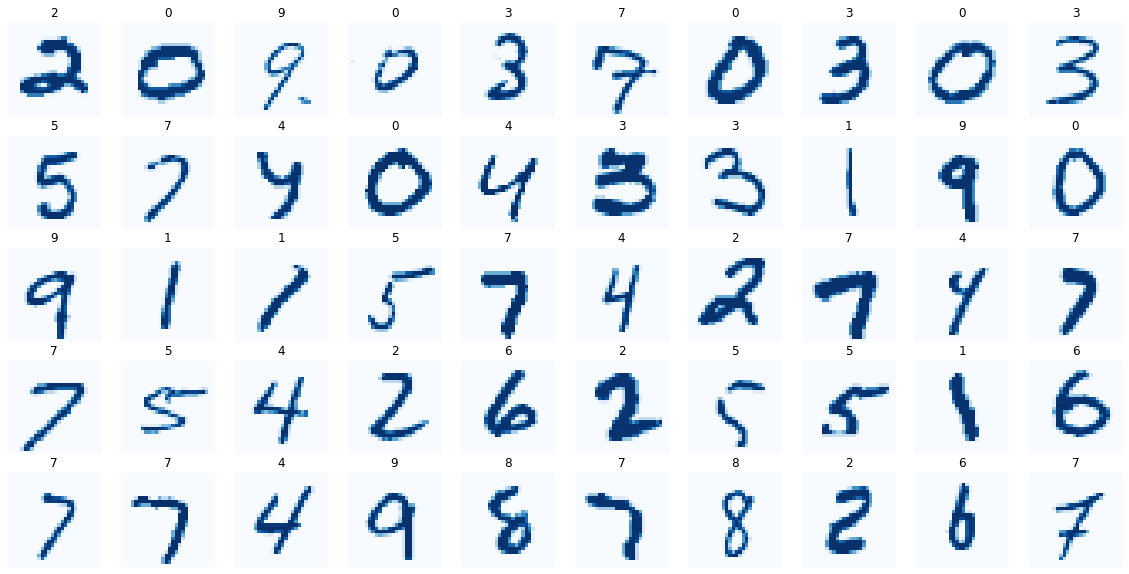

In [32]:
rows = 5
cols = 10

f = plt.figure(figsize=(2*cols,2*rows))

for i in range(rows*cols):
    f.add_subplot(rows,cols,i+1)
    plt.imshow(test_x[i].reshape([28,28]),cmap="Blues")
    plt.axis("off")
    plt.title(str(test_y[i]))

# Lets understand the intermediate layers of the model

<hr>

![hidden layers](https://i.stack.imgur.com/axn7z.jpg)

To visualize the output of each layer, we need to create a model to take input tensor and gives the list of output tensor, each representing the corresponding intermediate layers. To that, we need to create a multi-output model in which the input will be the image, and the output will be the list of intermediate layers.

<br>

I will use the Functional API of Keras to do so. When fed an image input, this model returns the values of the layer activations in the original model. 
<br>
I am taking all the intermediate layers except the Flatten and Dense layers. 
<br>

**model.layers** returns the list of layers of the model. Selecting all the layers except the last four layers. Then passing to **models.Model()** as a list of output layers and the input layer of the original model. It will return a new model having the input and output layers of the original model. 



**Check out these functions for more info:**
* [Model()](https://keras.io/models/model/)

In [33]:
# Extracts the outputs of all layers except Flatten and Dense layers
output_layers = [layer.output for layer in model.layers[:-4]]
# Creates a model that will return these outputs, given the model input (This is multi output model)
activation_model = models.Model(inputs=model.input, outputs=output_layers)

## Try to compare the layer 1 output 
<br>

In [34]:
# predicting the output of each layers
activations_2  = activation_model.predict(val_x[2].reshape([1,28,28,1]))
activations_6  = activation_model.predict(val_x[7].reshape([1,28,28,1]))
first_activation_layer  = activations_2[0]
first_activation_layer.shape

(1, 28, 28, 32)

**activation_2** and **activation_6** are the output of two different images. **first_activation_layer** represents the output of the first layer of the original model. The shape is (1,28,28,32) where 32 represent the number of **channels**. Let's compare the four different channels of the first layer of two different images.

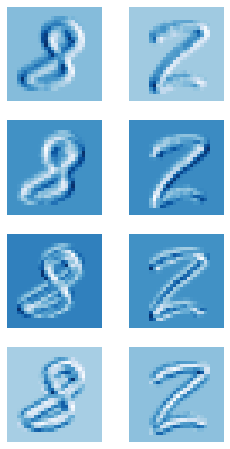

In [35]:
rows = 4
cols = 2

f = plt.figure(figsize=(2*cols,2*rows))

for i in range(4):
    f.add_subplot(rows,cols,2*i+1)
    plt.imshow(activations_2[0][0,:,:,i].reshape([28,28]),cmap="Blues")
    plt.axis("off") 

    f.add_subplot(rows,cols,2*i+2)
    plt.imshow(activations_6[0][0,:,:,i].reshape([28,28]),cmap="Blues")
    plt.savefig("layer_output_comparision"+str(i)+".png")
    plt.axis("off")

It seems that each channel is trying to depict something in both images, a kind of similar features. This can be concluded that each channel has been trained to find some specific features of the input images.

## Visualizing every channel in every intermediate activation

In [36]:
def plot_layer(layer,i,layer_name = None):
    rows = layer.shape[-1]/16
    cols = 16

    f = plt.figure(figsize=(1*cols,1*rows))
    # plt.imshow(first_activation_layer[0,:,:,:].reshape([14*4,14*16]),cmap="Blues")
    for i in range(layer.shape[-1]):
        f.add_subplot(rows,cols,i+1)
        plt.imshow(layer[0,:,:,i].reshape([layer.shape[2],layer.shape[2]]),cmap="Blues")
        plt.axis("off")
    f.suptitle(layer_name,fontsize=14)
    plt.savefig("intermidiate_layers"+str(i)+".png")
    plt.show()

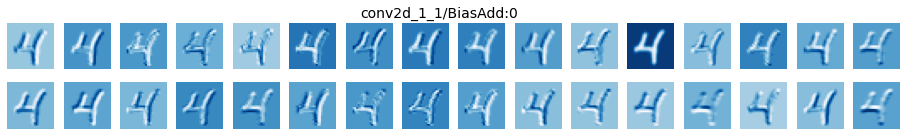

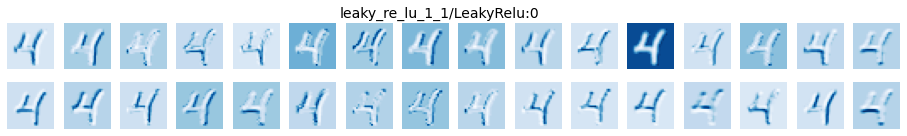

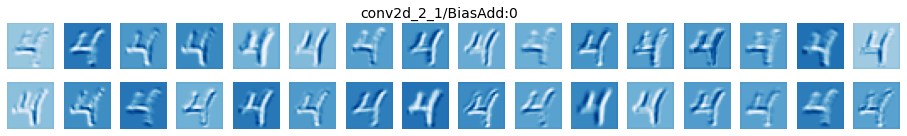

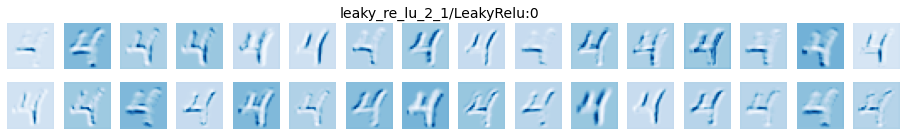

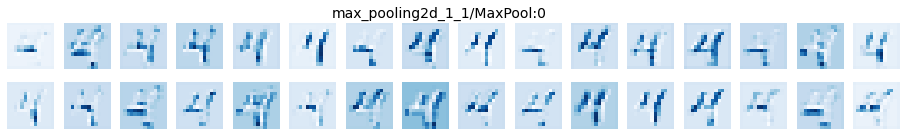

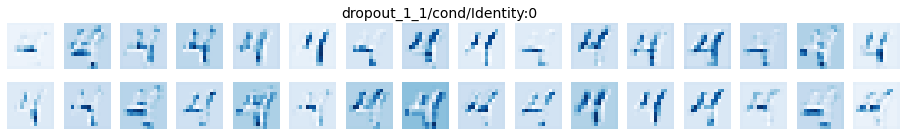

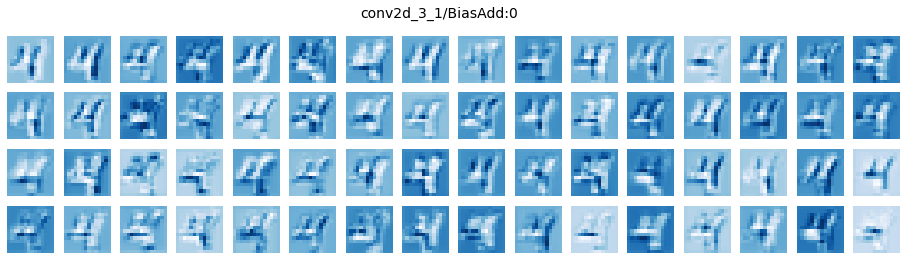

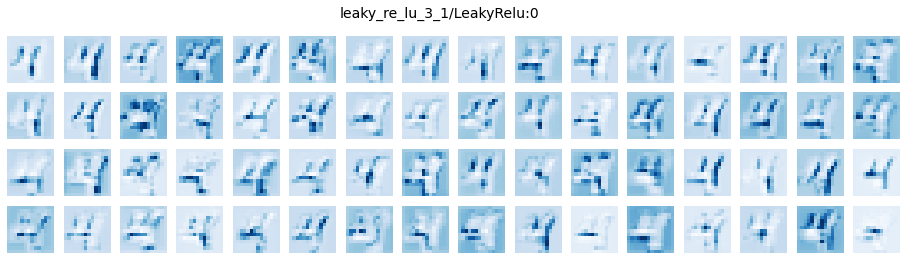

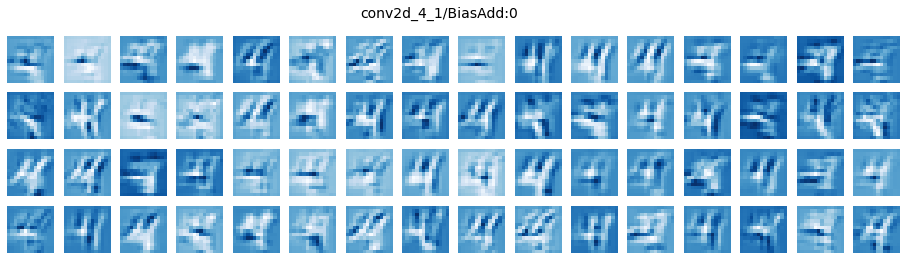

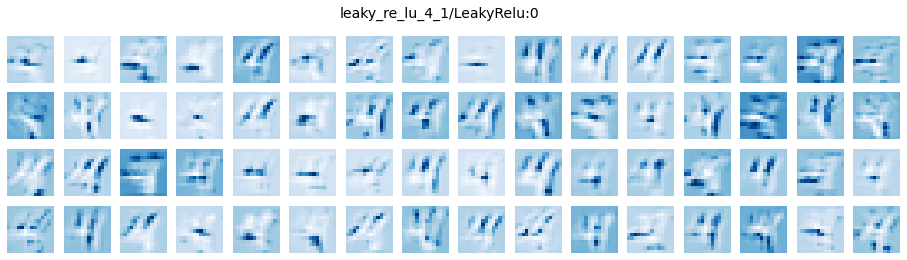

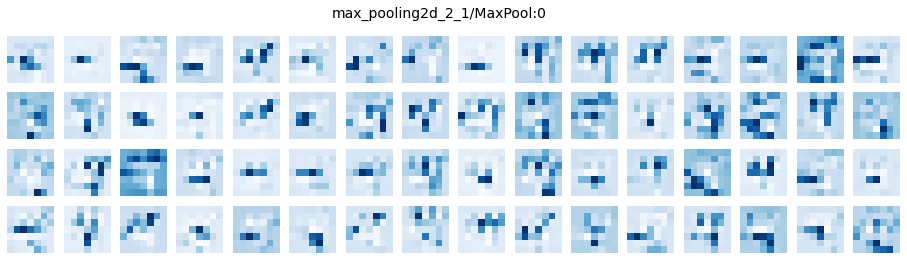

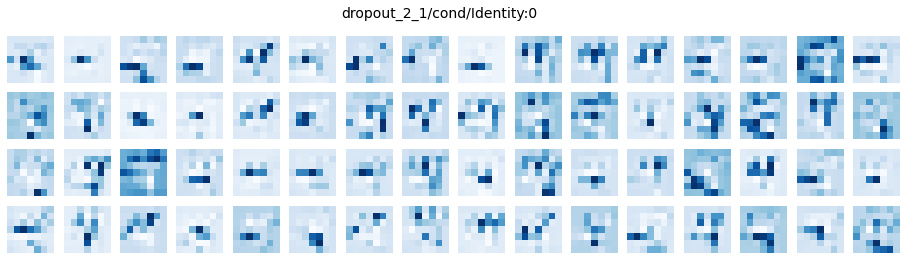

In [37]:
# Visualising each layers
for i,layer in enumerate(activation_model.predict(val_x[6].reshape([1,28,28,1]))):
    plot_layer(layer,i,output_layers[i].name)

So, try to understand what's happening inside the hidden layers:
* The first few layers retaining the shape of image but trying to get the very low-level features such as different types edges.
* As we go into the deeper layers, the activations are more abstract and less visually interpretable. These layers are trying to encode high-level features such as corners, angles, selective borders, etc.
* In the last few layers, We can't visually interpret anything; this is because layers are now encoding even more complex features, or we can say more information about the classes.

I hope you understand the basics of CNN after the visualization of intermediate layers even more.